![Logo UAH](https://fen.uahurtado.cl/wp-content/uploads/2019/01/logo-fen-2018-860x120-1.png "Logo UAH")
# <center>Trabajo 2
#### **Nombre** : Juan Licanqueo

Use los datos la base de datos que estamos usando en el curso.
1. Escoja tres empresas de la base de datos, de un mismo sector industrial. Cualquiera.
2. Calcule para cada una su razón corriente de los últimos ocho períodos. Aplique las etapas de análisis del anova:
- Vea si cumple la razón corriente con la normalidad para cada empresa. 
- Vea si se pueden considerar que cumplen con la homocedasticidad.
- Aplique el análisis anova considerando las tres empresas.
- Compare las diferencias aplicando el test de Tukey para las tres empresas.
3. ¿Le hizo sentido el análisis? ¿Cuál tiene un desempeño superior?

### Cargamos los modulos a usar.

In [199]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

### Definimos nuestro directorio de trabajo.

In [9]:
os.chdir('/Users/Juan/Desktop/trabajo_03/')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\trabajo_03'

### Cargamos la base de datos.

In [91]:
datos = pd.read_csv('dataset_chile_rev04.csv', sep = ',', header = 0)

C:\Users\Juan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Visualizamos los datos cargados.

In [81]:
datos.head(3)

,year,quarter,tic_bolsa,tic,nombre,rut,naic,deprecamor,caflfrusop,incometax,...,txdust,diinotccob,liabilityequity,nctrot,capitabursatil,economatica,rut_n,rut_b,n_quarter,date
0,2009,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,14917.68900,NaN,3860.95510,...,0.000,NaN,434260.030,0.0,310565.66236,Fondos,NaN,980000001,12,200912
1,2004,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,553.47302,NaN,911.87903,...,0.000,NaN,61398.859,0.0,114488,Fondos,NaN,980000001,12,200412
2,2020,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,4789.70510,NaN,20084.46500,...,18883.064,NaN,611868.690,0.0,780941.8755,Fondos,NaN,980000001,12,202012


### Calcularemos la variable Razon de Liquidez.

In [259]:
datos = datos.assign(razon_de_liquidez = lambda x:(x['currassets'] / x['currliab']))

### Reemplazamos los valores que hubieran resultado infinito de las nuevas variables calculadas con NAN. 

In [93]:
datos.replace([np.inf, -np.inf], np.nan, inplace = True)

### Seleccionaremos un sector económico.

In [330]:
Cant_EmpxSect = datos.groupby('naic').agg({'tic' : pd.Series.nunique}).sort_values(by = 'tic').reset_index()
Cant_EmpxSect[list(Cant_EmpxSect.tic).index(3):].set_axis(['Sector_Económico', 'Cantidad_Empresas'], axis = 1).head(5)

,Sector_Económico,Cantidad_Empresas
64,"Poderes ejecutivo, legislativo y otros poderes...",3
65,Servicios relacionados con el transporte aéreo,3
66,Servicios relacionados con la agricultura,3
67,-,3
68,Viveros forestales y recolección de productos ...,3


#### <center> *El sector económico seleccionado sera el de 'Servicios relacionados con la agricultura'.*

### Crearemos una base de datos con el filtro del sector seleccionado y además seleccionaremos las variables de interes que son TIC y RAZON_LIQUIDEZ.

In [263]:
datos_GA = datos[datos.naic == 'Servicios relacionados con la agricultura'].sort_values('date').loc[:,['tic','razon_de_liquidez']]
datos_GA

,tic,razon_de_liquidez
37800,AGROSUPER,NaN
34177,COAGRA,NaN
25758,HF,NaN
24210,HF,NaN
38846,COAGRA,NaN
...,...,...
25712,HF,1.551919
33999,COAGRA,1.434096
5449,HF,NaN
2473,COAGRA,NaN


### Acotaremos el data frame creado a los últimos ocho periodos, como son tres empresas los datos requeridos serán los últimos 24, además eliminaremos los datos NA.

In [264]:
datos_GA_VT = datos_GA.iloc[(len(datos_GA.razon_de_liquidez)-24):len(datos_GA.razon_de_liquidez),].dropna()
datos_GA_VT

,tic,razon_de_liquidez
23946,COAGRA,1.729047
18641,HF,1.109461
23350,AGROSUPER,2.016848
30413,HF,1.017151
23986,COAGRA,2.023542
16803,AGROSUPER,2.191711
41098,AGROSUPER,2.728613
40750,COAGRA,1.592788
31133,HF,1.715346
2484,COAGRA,1.491399


### Generamos una tabla descriptiva de los datos seleccionados.

In [239]:
datos_GA_VT.groupby('tic')['razon_de_liquidez'].agg(['size', 'mean', 'std'])

,size,mean,std
tic,,,
AGROSUPER,7,2.861715,0.663327
COAGRA,7,1.677085,0.214059
HF,7,1.492802,0.319830


#### <center> *De la tabla podemos apreciar que Coagra Agroindustrial S.A y HF servicios agrícolas y ganaderos respecto a su indicador de liquidez son bastante parecidos, en tanto AGROSUPER tiene una mayor liquidez y desviación estandar.*

### A continuación gráficaremos con box-plot el comportamiento de los datos y ratificaremos lo ya observado el la tabla anterior.

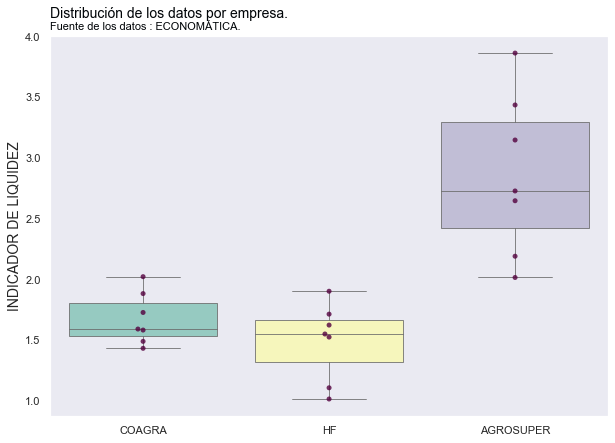

In [314]:
plt.figure(figsize=(10,7))

plt.suptitle('Distribución de los datos por empresa.',
          color = '#000407',
          fontsize = 14,
          x = 0.125,
          y = 0.937,
          ha = 'left'
         )

plt.title('Fuente de los datos : ECONOMÁTICA.',
          color = '#000407',
          fontsize = 11,
          loc = 'left')

sns.set_theme(style="dark")

ax = sns.boxplot(x="tic", 
            y="razon_de_liquidez", 
            data = datos_GA_VT, 
            palette = 'Set3',
           linewidth = 0.8)

ax.set_xlabel(None)

ax.set_ylabel('INDICADOR DE LIQUIDEZ',
          fontsize = 14)

bx = sns.swarmplot(x= "tic", 
              y= "razon_de_liquidez", 
              data= datos_GA_VT, 
              color= '#53003E', 
              alpha = 0.8)

bx.set_xlabel(None)

bx.set_ylabel('INDICADOR DE LIQUIDEZ',
          fontsize = 14)

plt.show()

#### <center> *De la gráfica de box plot ratificamos que AGROSUPER es el que tiene mayor liquidez y dispersión, tambien podemos verificar que Coagra Agroindustrial S.A y HF servicios agrícolas tienen un comportamiento parecido y sus medias son muy cercanas siendo HF la que tiene mayor variabilidad de las dos.* 

### Gráficaremos los QQplot para observar si los datos de cada empresa siguen una distribución normal.

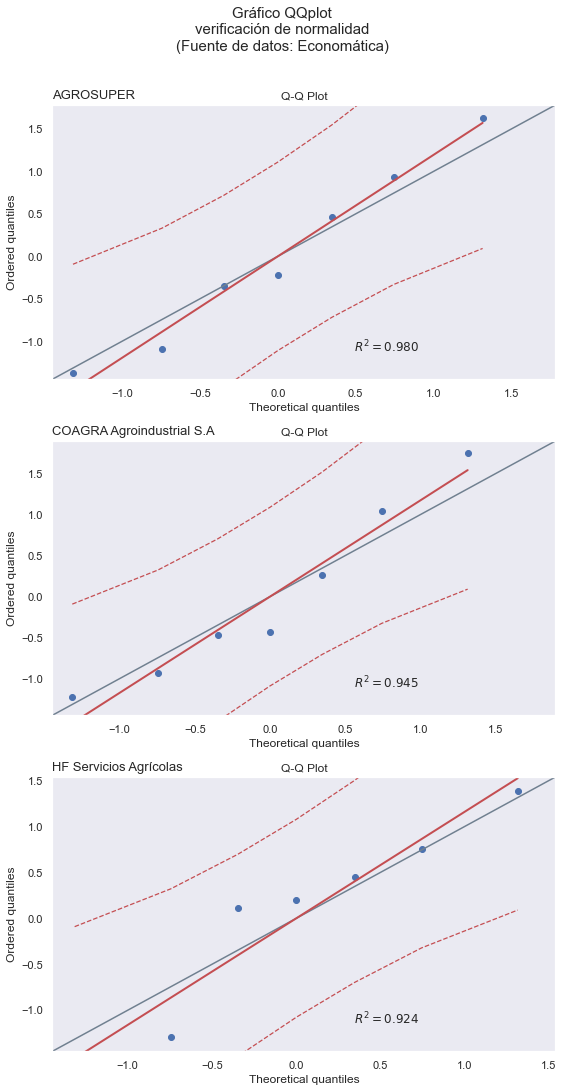

In [329]:
# Gráficos qqplot 8 periodos
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 15))
fig.suptitle('Gráfico QQplot\nverificación de normalidad\n(Fuente de datos: Economática)',
            fontsize = 15,
            y = 1.01)
# ==============================================================================
# CENCOSUD
pg.qqplot(datos_GA_VT.loc[datos_GA_VT.tic=='AGROSUPER', 'razon_de_liquidez'], 
          dist='norm', 
          ax=axs[0])

axs[0].set_title('AGROSUPER',
                loc = 'left',
                fontsize = 13) 
# ==============================================================================
# FALABELLA
pg.qqplot(datos_GA_VT.loc[datos_GA_VT.tic=='COAGRA', 'razon_de_liquidez'], 
          dist='norm', 
          ax=axs[1])

axs[1].set_title('COAGRA Agroindustrial S.A',
                loc = 'left',
                fontsize = 13)
# ==============================================================================
# FORUS
pg.qqplot(datos_GA_VT.loc[datos_GA_VT.tic=='HF', 'razon_de_liquidez'], 
          dist='norm', 
          ax=axs[2])

axs[2].set_title('HF Servicios Agrícolas',
                loc = 'left',
                fontsize = 13)
# ==============================================================================

plt.tight_layout()
plt.show()

#### <center> *Según la gráfica para las tres empresas selccionadas sus datos siguen una distribución normal, tambien podemos apreciar el R2 que nos indica que los datos tiene poca variabilidad respecto a la recta regresión lineal.*

### A continuación verificaremos lo anterior aplicando el test de normalidad de Shapiro - Wilk. 

In [246]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(datos_GA_VT, dv = 'razon_de_liquidez', group = 'tic')

,W,pval,normal
COAGRA,0.934182,0.587003,True
HF,0.916279,0.441054,True
AGROSUPER,0.967075,0.876618,True


#### <center>*Del test podemos apreciar que los p-valores de las tres empresas no son significativos(mayores a 0.05), esto quiere decir que no hay suficiente evidencia estadistica para rechazar H0(los datos siguen una distribución normal) por lo cuál caemos en el ERROR TIPO 1, y podemos decir que los datos de las tres empresas siguen una distribución normal.*

### Ahora aplicaremos el test de LEVENE para verificar si los datos de las tres empresas tienen varianza constante o igual, para esto analizaremos si los grupos son homecedasticos.

In [265]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(datos_GA_VT, dv = 'razon_de_liquidez', group = 'tic', method='levene')

,W,pval,equal_var
levene,3.279652,0.061025,True


#### <center>*Del test podemos apreciar que el p-valor no es significativo(mayores a 0.05), por lo cuál no hay suficiente evidencia estadistica para rechazar H0(no existe diferencia entre las varianzas), entonces caemos en el ERROR TIPO 1, y podemos decir que la varianzas son constantes o iguales entre las tres empresas tambien cumplirian que los grupos son homocedasticos.*

### Realizaremos el análisis de varianza (ANOVA) de una sola vía para determinar si existen diferencias estadísticamente significativas entre las medias de las tres empresas.

In [256]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(datos_GA_VT, dv= 'razon_de_liquidez', between='tic', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,tic,7.726208,2,3.863104,19.705883,0.000029,0.686475
1,Within,3.528686,18,0.196038,NaN,NaN,NaN


#### <center> *Del test podemos apreciar que el p-valor es significativo(menor a 0.05), por lo cuál rechazamos H0(las medias de los grupos son iguales), en este caso debemos tomar la hipótesis alternativa que es H1 la que nos dice que al menos una de las empresas tiene diferente media con respecto a las demás, para este caso caemos en el ERROR TIPO 2.*

### Debido a que en la prueba anterior (ANOVA) se determino que hay diferencias estadísticamente significativas de las medias de las empresas, ahora debemos determinar cuál o cuales de estas son diferentes para eso debemos realizar una prueba POST HOC, como las empresas son homocedasticas esto nos permite aplicar la prueba de post hoc de TUKEY(HSD).

In [267]:
pg.pairwise_tukey(datos_GA_VT, dv='razon_de_liquidez', between='tic').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,AGROSUPER,COAGRA,2.862,1.677,1.185,0.237,5.005,0.001,2.505
1,AGROSUPER,HF,2.862,1.493,1.369,0.237,5.784,0.001,2.894
2,COAGRA,HF,1.677,1.493,0.184,0.237,0.779,0.709,0.390


#### <center> *De la prueba podemos apreciar que AGROSUPER presenta diferencias estadísticamente significativas con respecto a Coagra Agroindustrial S.A y HF servicios agrícolas ya que su p-valor es menor a 0.05, por lo cuál para ambas comparaciones rechazamos H0(las medias son iguales), en este caso debemos tomar la hipótesis alternativa que es H1 la que nos dice las medias son diferentes y caemos en el ERROR TIPO 2, de esto podemos decir que el indicador de liquidez es mayor de AGROSUPER respecto a las otras dos empresas lo podemos ratificar observando la gráfica de box plot. En cambio Coagra Agroindustrial S.A y HF servicios agrícolas su p-valor no es signficativo por lo cuál no hay suficiente evidencia estadistica para rechazar H0, caemos en el ERROR TIPO 1, esto quiere decir que sus medias son iguales y sus indicadores de liquidez son similares.*